Loss(MSE) for learning rate: 0.005:  0.12193166464567184
Loss(MSE) for learning rate: 0.001:  0.4846150577068329
Loss(MSE) for learning rate: 0.0001:  2.1844358444213867


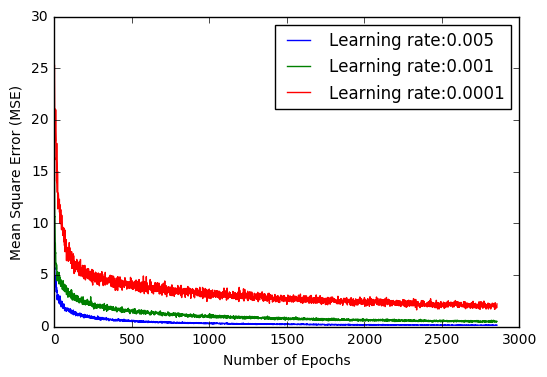

In [7]:
# Linear Regression Ques 1
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Function to add bias term to the input and to vectorize the image. 
def data_modifier(inp_array):
    shape_vec = inp_array.shape
    inp_array = np.reshape(inp_array, (shape_vec[0],784))
    inp_array = np.c_[np.ones(shape_vec[0]), inp_array]
    inp_array = target_modifier(inp_array)
    return inp_array

# Function to change the data type to float - 32
def target_modifier(inp_array):
    inp_array = inp_array.astype(np.float32)
    return inp_array


with np.load("notMNIST.npz") as data :
	Data, Target = data ["images"], data["labels"]
	posClass = 2
	negClass = 9
	dataIndx = (Target==posClass) + (Target==negClass)
	Data = Data[dataIndx]/255.
	Target = Target[dataIndx].reshape(-1, 1)
	Target[Target==posClass] = 1
	Target[Target==negClass] = 0
	np.random.seed(521)
	randIndx = np.arange(len(Data))
	np.random.shuffle(randIndx)
	Data, Target = Data[randIndx], Target[randIndx]
	trainData, trainTarget = Data[:3500], Target[:3500]
	validData, validTarget = Data[3500:3600], Target[3500:3600]
	testData, testTarget = Data[3600:], Target[3600:]
    
# Basic parameters
shape_vec = trainData.shape
image_size = shape_vec[1] * shape_vec[2]

# Casting inputs to proper forms
trainData = data_modifier(trainData)
trainTarget = target_modifier(trainTarget)
testData = data_modifier(testData)
testTarget = target_modifier(testTarget)
validData = data_modifier(validData)
validTarget = target_modifier(validTarget)

# Hyper-parameters
n_epochs = 1000 # No of epochs
learning_rate = [0.005,0.001,0.0001]
B = 500 # mini_batch_size

# Defining placeholders for batch learning
X = tf.placeholder(tf.float32, shape=[None, image_size+1], name='X')
y = tf.placeholder(tf.float32, shape=[None, 1], name='y')

#theta is the array of weights.
theta = tf.Variable(tf.random_uniform([image_size+1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error)/2, name="mse")

plt.figure()

# Looping for different learning rate values
for i in range(0,3):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate[i])
    training_op = optimizer.minimize(mse)


    init = tf.global_variables_initializer() 

    losses_array = []

    with tf.Session() as sess:
        sess.run(init)

        for step in range(0,20000):
            i_batch = (step % 7)*B # Since an epoch consists of 7 batches in our case. 
            batch = trainData[i_batch:i_batch+B], trainTarget[i_batch:i_batch+B]
            _,loss_val = sess.run([training_op,mse], feed_dict={X: batch[0] , y: batch[1]})

            if (step%7 == 6):
                losses_array = np.append(losses_array,loss_val)
                # Shuffling the training data
                rand_idxs = np.arange(len(trainData))
                np.random.shuffle(rand_idxs)
                trainData = trainData[rand_idxs]
                trainTarget = trainTarget[rand_idxs]
        
        print('Loss(MSE) for learning rate: '+str(learning_rate[i])+': ', losses_array[-1])
        
    plt.plot(losses_array, label='Learning rate:'+str(learning_rate[i]))
    

plt.xlabel('Number of Epochs')
plt.ylabel('Mean Square Error (MSE)')
plt.legend()
plt.savefig('LR1.png')
plt.show()
    

Mini-batch size, B:500 loss(MSE):  0.12193166464567184
Mini-batch size, B:1500 loss(MSE):  0.1289837658405304
Mini-batch size, B:3500 loss(MSE):  0.12127415090799332


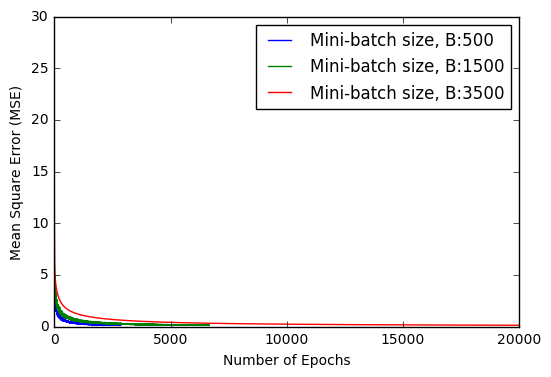

In [8]:
# Linear Regression Ques 2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import time

# Function to add bias term to the input and to vectorize the image. 
def data_modifier(inp_array):
    shape_vec = inp_array.shape
    inp_array = np.reshape(inp_array, (shape_vec[0],784))
    inp_array = np.c_[np.ones(shape_vec[0]), inp_array]
    inp_array = target_modifier(inp_array)
    return inp_array

# Function to change the data type to float - 32
def target_modifier(inp_array):
    inp_array = inp_array.astype(np.float32)
    return inp_array

with np.load("notMNIST.npz") as data :
	Data, Target = data ["images"], data["labels"]
	posClass = 2
	negClass = 9
	dataIndx = (Target==posClass) + (Target==negClass)
	Data = Data[dataIndx]/255.
	Target = Target[dataIndx].reshape(-1, 1)
	Target[Target==posClass] = 1
	Target[Target==negClass] = 0
	np.random.seed(521)
	randIndx = np.arange(len(Data))
	np.random.shuffle(randIndx)
	Data, Target = Data[randIndx], Target[randIndx]
	trainData, trainTarget = Data[:3500], Target[:3500]
	validData, validTarget = Data[3500:3600], Target[3500:3600]
	testData, testTarget = Data[3600:], Target[3600:]
    
# Basic parameters
shape_vec = trainData.shape
image_size = shape_vec[1] * shape_vec[2]

# Casting inputs to proper forms
trainData = data_modifier(trainData)
trainTarget = target_modifier(trainTarget)
testData = data_modifier(testData)
testTarget = target_modifier(testTarget)
validData = data_modifier(validData)
validTarget = target_modifier(validTarget)

# Hyper-parameters
learning_rate = 0.005
B = [500, 1500, 3500] #mini_batch_size

# Defining placeholders for batch learning
X = tf.placeholder(tf.float32, shape=[None, image_size+1], name='X')
y = tf.placeholder(tf.float32, shape=[None, 1], name='y')

#theta is the array of weights.
theta = tf.Variable(tf.random_uniform([image_size+1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error)/2, name="mse")


plt.figure()

# Looping for different mini-batches values

for i in range(0,3):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(mse)


    init = tf.global_variables_initializer() 
    batches_in_epochs = (3500 // B[i]) + (3500 % B[i] != 0)
    
    # For storing training error after every epoch
    losses_array = []

    with tf.Session() as sess:
        sess.run(init)

        for step in range(0,20000):
            i_batch = (step % batches_in_epochs )*B[i]
            batch = trainData[i_batch:i_batch+B[i]], trainTarget[i_batch:i_batch+B[i]]

            _,loss_val = sess.run([training_op,mse], feed_dict={X: batch[0] , y: batch[1]})
            
            if ((step % batches_in_epochs + 1)*B[i] >= 3500):
                losses_array = np.append(losses_array,loss_val)
                # Shuffling data
                rand_idxs = np.arange(len(trainData))
                np.random.shuffle(rand_idxs)
                trainData = trainData[rand_idxs]
                trainTarget = trainTarget[rand_idxs]
            
        best_theta = theta.eval()
                
    
    plt.plot(losses_array, label='Mini-batch size, B:'+str(B[i]))
    print('Mini-batch size, B:'+str(B[i])+ ' loss(MSE): ', losses_array[-1])

plt.xlabel('Number of Epochs')
plt.ylabel('Mean Square Error (MSE)')
plt.legend()
plt.savefig('LR2.png')
plt.show()


In [10]:
# Linear Regression Ques 3
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Function to add bias term to the input and to vectorize the image. 
def data_modifier(inp_array):
    shape_vec = inp_array.shape
    inp_array = np.reshape(inp_array, (shape_vec[0],784))
    inp_array = np.c_[np.ones(shape_vec[0]), inp_array]
    inp_array = target_modifier(inp_array)
    return inp_array

# Function to change the data type to float - 32
def target_modifier(inp_array):
    inp_array = inp_array.astype(np.float32)
    return inp_array

# Function to evaluate the performace
def calculator(x, y):
    y_pred = tf.matmul(x, best_theta)
    err = tf.reduce_mean(tf.square(y-y_pred))
    return [err]

with np.load("notMNIST.npz") as data :
	Data, Target = data ["images"], data["labels"]
	posClass = 2
	negClass = 9
	dataIndx = (Target==posClass) + (Target==negClass)
	Data = Data[dataIndx]/255.
	Target = Target[dataIndx].reshape(-1, 1)
	Target[Target==posClass] = 1
	Target[Target==negClass] = 0
	np.random.seed(521)
	randIndx = np.arange(len(Data))
	np.random.shuffle(randIndx)
	Data, Target = Data[randIndx], Target[randIndx]
	trainData, trainTarget = Data[:3500], Target[:3500]
	validData, validTarget = Data[3500:3600], Target[3500:3600]
	testData, testTarget = Data[3600:], Target[3600:]
    
# Basic parameters
shape_vec = trainData.shape
image_size = shape_vec[1] * shape_vec[2]

# Casting inputs to proper forms
trainData = data_modifier(trainData)
trainTarget = target_modifier(trainTarget)

validData = data_modifier(validData)
validTarget = target_modifier(validTarget)

testData = data_modifier(testData)
testTarget = target_modifier(testTarget)


# Hyper-parameters
learning_rate = 0.005
B = 500 #mini_batch_size
reg_param = [0, 0.001, 0.1, 1] # regularization parameter 

# Looping for different regularization parameters
for i in range(0,4):
    
    # Defining placeholders for batch learning
    X = tf.placeholder(tf.float32, shape=[None, image_size+1], name='X')
    y = tf.placeholder(tf.float32, shape=[None, 1], name='y')

    #theta is the array of weights.
    theta = tf.Variable(tf.random_uniform([image_size+1, 1], -1.0, 1.0, seed=42), name="theta")
    y_pred = tf.matmul(X, theta, name="predictions")
    error1 = tf.reduce_mean(tf.square(y_pred - y)/2)
    
    error2 = tf.scalar_mul(reg_param[i]/2, tf.reduce_sum(tf.square(theta)))

    error = tf.add(error1,error2)

    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(error)
    
    init = tf.global_variables_initializer() 
    batches_in_epochs = (3500 // B) + (3500 % B != 0)
    losses_array = []

    with tf.Session() as sess:
        sess.run(init)

        for step in range(0,20000):
            i_batch = (step % batches_in_epochs )*B
            batch = trainData[i_batch:i_batch+B], trainTarget[i_batch:i_batch+B]
            _,loss_val = sess.run([training_op,error], feed_dict={X: batch[0] , y: batch[1]})
            
            if ((step % batches_in_epochs + 1)*B >= 3500):  
                losses_array = np.append(losses_array,loss_val)
                rand_idxs = np.arange(len(trainData))
                np.random.shuffle(rand_idxs)
                trainData = trainData[rand_idxs]
                trainTarget = trainTarget[rand_idxs]

        best_theta = theta.eval()
        
        y_val_pred = tf.clip_by_value(tf.round(tf.matmul(validData, best_theta)),0,1)
        err = np.absolute(sess.run(y_val_pred)-validTarget)
        err = sum(err/len(err))
        
        y_test_pred = tf.clip_by_value(tf.round(tf.matmul(testData, best_theta)),0,1)
        test_err = np.absolute(sess.run(y_test_pred)-testTarget)
        test_err = sum(test_err/len(test_err))
        
        y_train_pred = tf.clip_by_value(tf.round(tf.matmul(trainData, best_theta)),0,1)
        train_err = np.absolute(sess.run(y_train_pred)-trainTarget)
        train_err = sum(train_err/len(train_err))
        
        print('Training MSE: '+str(reg_param[i])+': ', losses_array[-1])
        print('Training classification error at lambda='+str(reg_param[i])+': ',train_err*100,'%')
        print('Validation classification error at lambda='+str(reg_param[i])+': ',err*100,'%')
        print('Test classification error at lambda='+str(reg_param[i])+': ',test_err*100,'%')




Training MSE: 0:  0.12193166464567184
Training classification error at lambda=0:  [15.514313] %
Validation classification error at lambda=0:  [12.999998] %
Test classification error at lambda=0:  [20.000006] %
Training MSE: 0.001:  0.14372456073760986
Training classification error at lambda=0.001:  [13.54288] %
Validation classification error at lambda=0.001:  [11.999998] %
Test classification error at lambda=0.001:  [17.241385] %
Training MSE: 0.1:  0.018604028970003128
Training classification error at lambda=0.1:  [3.4000027] %
Validation classification error at lambda=0.1:  [4.] %
Test classification error at lambda=0.1:  [3.4482758] %
Training MSE: 1:  0.035367149859666824
Training classification error at lambda=1:  [5.0857205] %
Validation classification error at lambda=1:  [4.9999995] %
Test classification error at lambda=1:  [4.827586] %


In [13]:
# Linear Regression Ques 4
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Function to add bias term to the input and to vectorize the image. 
def data_modifier(inp_array):
    shape_vec = inp_array.shape
    inp_array = np.reshape(inp_array, (shape_vec[0],784))
    inp_array = np.c_[np.ones(shape_vec[0]), inp_array]
    inp_array = target_modifier(inp_array)
    return inp_array

# Function to change the data type to float - 32
def target_modifier(inp_array):
    inp_array = inp_array.astype(np.float32)
    return inp_array

# Function to evaluate the performace
def calculator(x, y):
    y_pred = tf.matmul(x, best_theta)
    err = tf.reduce_mean(tf.square(y-y_pred))
    return [err]

with np.load("notMNIST.npz") as data :
	Data, Target = data ["images"], data["labels"]
	posClass = 2
	negClass = 9
	dataIndx = (Target==posClass) + (Target==negClass)
	Data = Data[dataIndx]/255.
	Target = Target[dataIndx].reshape(-1, 1)
	Target[Target==posClass] = 1
	Target[Target==negClass] = 0
	np.random.seed(521)
	randIndx = np.arange(len(Data))
	np.random.shuffle(randIndx)
	Data, Target = Data[randIndx], Target[randIndx]
	trainData, trainTarget = Data[:3500], Target[:3500]
	validData, validTarget = Data[3500:3600], Target[3500:3600]
	testData, testTarget = Data[3600:], Target[3600:]
    
# Basic parameters
shape_vec = trainData.shape
image_size = shape_vec[1] * shape_vec[2]

# Casting inputs to proper forms
trainData = tf.constant(data_modifier(trainData), dtype=tf.float32, name="trainData")
trainTarget = tf.constant(trainTarget, dtype=tf.float32, name="trainTarget")

validData = data_modifier(validData)
validTarget = target_modifier(validTarget)

testData = data_modifier(testData)
testTarget = target_modifier(testTarget)


#Defining the matrices
corr_matrix = tf.matmul(trainData, trainData, transpose_a=True)
inv_corr_matrix = tf.matrix_inverse(corr_matrix)
multiplier = tf.matmul(trainData, trainTarget, transpose_a=True)
theta = tf.matmul(inv_corr_matrix, multiplier)
training_preds = tf.round(tf.matmul(trainData, theta))
training_err = tf.reduce_mean(tf.abs(training_preds-trainTarget))

init = tf.global_variables_initializer()

#Using closed form formula for finding error
with tf.Session() as sess:
    init.run()
    best_theta = theta.eval()
    trainerror = training_err.eval()
    
    y_val_pred = tf.clip_by_value(tf.round(tf.matmul(validData, best_theta)),0,1)
    valid_err = np.absolute(sess.run(y_val_pred)-validTarget)
    valid_err = sum(err/len(err))
     
    y_test_pred = tf.clip_by_value(tf.round(tf.matmul(testData, best_theta)),0,1)
    test_err = np.absolute(sess.run(y_test_pred)-testTarget)
    test_err = sum(test_err/len(test_err))
      
    y_train_pred = tf.clip_by_value(tf.round(tf.matmul(trainData, best_theta)),0,1)
    train_err = np.absolute(sess.run(y_train_pred)-sess.run(trainTarget))
    train_err = sum(train_err/len(train_err))

    print('Test set misclassification percentage: ',test_err*100, '%')
    print('Validation set misclassification percentage: ',valid_err*100, '%')
    print('Training set misclassification percentage: ',train_err*100, '%')
    print('Training set MSE', trainerror)


Test set misclassification percentage:  [4.137931] %
Validation set misclassification percentage:  2.9999999329447746 %
Training set misclassification percentage:  [0.657143] %
Training set MSE 0.0065714284
